In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("database.sqlite") 

## Question Number 1

In [4]:
query = """
SELECT JobTitle, AVG(TotalPayBenefits) AS AvgTotalPayBenefits
FROM Salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
GROUP BY JobTitle
ORDER BY AvgTotalPayBenefits DESC;
"""

# Run query and store result in DataFrame
df = pd.read_sql_query(query, conn)

# Show top 5 results
df.head()

,JobTitle,AvgTotalPayBenefits
0,Chief Investment Officer,436224.360000
1,Chief of Police,411732.266667
2,"Chief, Fire Department",408865.326667
3,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
4,"Gen Mgr, Public Trnsp Dept",380696.440000


## Question Number 2

In [5]:
uery = """
SELECT Year, JobTitle, COUNT(*) AS EmployeeCount
FROM Salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
GROUP BY Year, JobTitle
HAVING COUNT(*) = (
    SELECT MAX(cnt) FROM (
        SELECT Year AS y, JobTitle AS jt, COUNT(*) AS cnt
        FROM Salaries
        WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
        GROUP BY Year, JobTitle
        HAVING y = Salaries.Year
    )
)
ORDER BY Year;
"""

# Run query and load into DataFrame
df = pd.read_sql_query(query, conn)

# Display result
df


,JobTitle,AvgTotalPayBenefits
0,Chief Investment Officer,436224.360000
1,Chief of Police,411732.266667
2,"Chief, Fire Department",408865.326667
3,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
4,"Gen Mgr, Public Trnsp Dept",380696.440000
...,...,...
2153,SPECIAL ASSISTANT XIV,673.800000
2154,"BOARD/COMMISSION MEMBER, GROUP III",638.787879
2155,"BdComm Mbr, Grp2,M=$25/Mtg",475.047742
2156,"BOARD/COMMISSION MEMBER, GROUP II",296.511628


## Question Number 3

In [6]:
query = """
SELECT COUNT(DISTINCT EmployeeName) AS UniqueEmployeeCount
FROM Salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
"""

df = pd.read_sql_query(query, conn)
df



,UniqueEmployeeCount
0,110810


## Question Number 4

In [7]:
query = """
SELECT EmployeeName, JobTitle, TotalPayBenefits
FROM Salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
ORDER BY TotalPayBenefits DESC
"""

df = pd.read_sql_query(query, conn)
df

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),538909.28
2,David Shinn,Deputy Chief 3,510732.68
3,Amy P Hart,Asst Med Examiner,479652.21
4,William J Coaker Jr.,Chief Investment Officer,436224.36
...,...,...,...
148645,Roy I Tillery,Custodian,0.00
148646,Timothy E Gibson,Police Officer 3,-2.73
148647,Mark E Laherty,Police Officer 3,-8.20
148648,David P Kucia,Police Officer 3,-33.89


## Question Number 5

In [8]:
query = """
SELECT EmployeeName, JobTitle, TotalPayBenefits
FROM Salaries
WHERE JobTitle = 'Firefighter'
  AND TotalPayBenefits BETWEEN 125000 AND 150000
  AND JobTitle NOT IN ('Not Provided', 'Not provided')
"""

df = pd.read_sql_query(query, conn)
df


,EmployeeName,JobTitle,TotalPayBenefits
0,Randall Henderson,Firefighter,147912.75
1,Virginia Cheung,Firefighter,147862.14
2,Travis Hemenez,Firefighter,147664.12
3,Gail Readdie,Firefighter,147452.17
4,Gregory Ginotti,Firefighter,147216.47
...,...,...,...
110,Stephen J Kloster,Firefighter,126784.13
111,Jeffrey D Ryan,Firefighter,126687.13
112,Jovan R Blake,Firefighter,126169.62
113,Dino M Cafferata,Firefighter,125680.52


## Question Number 6

In [9]:
query = """
SELECT EmployeeName, JobTitle, TotalPayBenefits
FROM Salaries
WHERE JobTitle = 'Firefighter'
  AND TotalPayBenefits BETWEEN 125000 AND 150000
  AND EmployeeName NOT IN ('Not Provided', 'Not provided')
"""

df = pd.read_sql_query(query, conn)
df


,EmployeeName,JobTitle,TotalPayBenefits
0,Randall Henderson,Firefighter,147912.75
1,Virginia Cheung,Firefighter,147862.14
2,Travis Hemenez,Firefighter,147664.12
3,Gail Readdie,Firefighter,147452.17
4,Gregory Ginotti,Firefighter,147216.47
...,...,...,...
110,Stephen J Kloster,Firefighter,126784.13
111,Jeffrey D Ryan,Firefighter,126687.13
112,Jovan R Blake,Firefighter,126169.62
113,Dino M Cafferata,Firefighter,125680.52


## Question Number 7

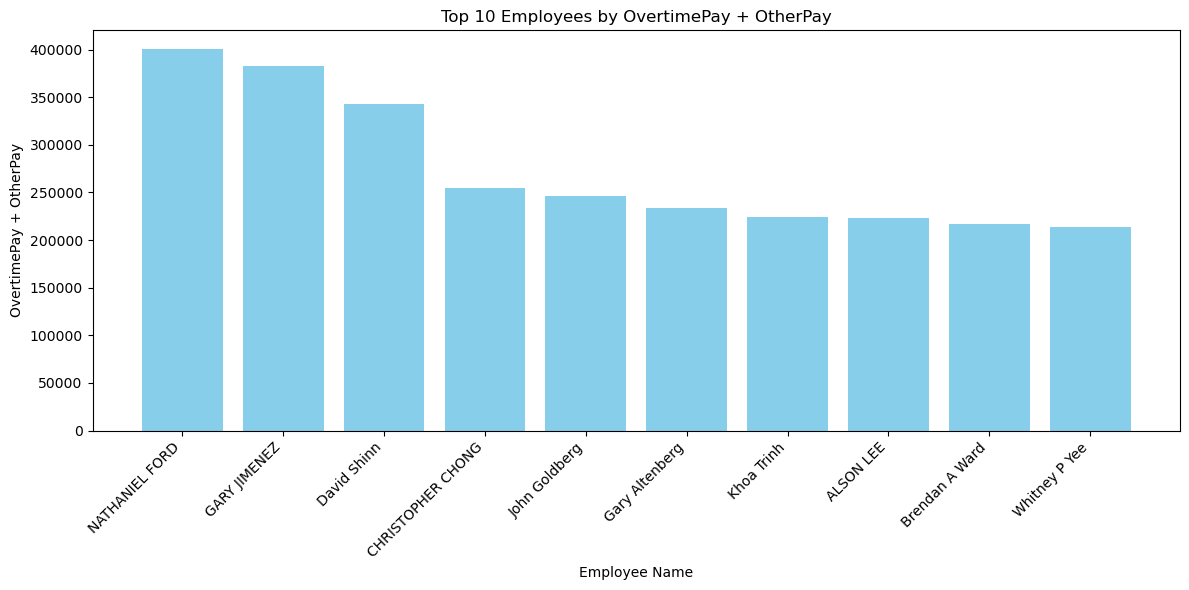

In [10]:
query = """
SELECT EmployeeName, (OvertimePay + OtherPay) AS ExtraPay
FROM Salaries
WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
ORDER BY ExtraPay DESC
LIMIT 10
"""

df = pd.read_sql_query(query, conn)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['EmployeeName'], df['ExtraPay'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employee Name')
plt.ylabel('OvertimePay + OtherPay')
plt.title('Top 10 Employees by OvertimePay + OtherPay')
plt.tight_layout()
plt.show()


## Question Number 8

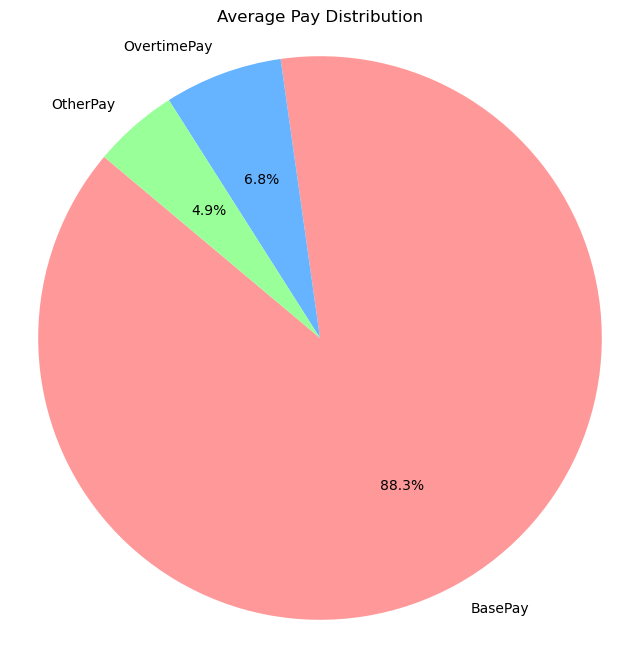

In [11]:
query = """
SELECT 
    AVG(BasePay) AS AvgBasePay,
    AVG(OvertimePay) AS AvgOvertimePay,
    AVG(OtherPay) AS AvgOtherPay
FROM Salaries
WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
"""

df = pd.read_sql_query(query, conn)

# Pie chart
import matplotlib.pyplot as plt

labels = ['BasePay', 'OvertimePay', 'OtherPay']
values = [df['AvgBasePay'][0], df['AvgOvertimePay'][0], df['AvgOtherPay'][0]]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Average Pay Distribution')
plt.axis('equal')
plt.show()


## Question Number 9

In [12]:
query = """
SELECT JobTitle, AVG(TotalPayBenefits) AS AvgTotalPayBenefits
FROM Salaries
WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
GROUP BY JobTitle
HAVING AVG(TotalPayBenefits) > 75000
"""

df = pd.read_sql_query(query, conn)
df


,JobTitle,AvgTotalPayBenefits
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


## Question Number 10

In [13]:
query = """
SELECT JobTitle, COUNT(EmployeeName) AS EmployeeCount
FROM Salaries
WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
GROUP BY JobTitle
HAVING COUNT(EmployeeName) > 10
"""

df = pd.read_sql_query(query, conn)
df


,JobTitle,EmployeeCount
0,ACCOUNT CLERK,83
1,ACCOUNTANT INTERN,48
2,ADMINISTRATIVE ANALYST,93
3,AIRPORT COMMUNICATIONS OPERATOR,27
4,AIRPORT ECONOMIC PLANNER,13
...,...,...
1151,Wire Rope Cable Maint Mechanic,30
1152,Worker's Comp Supervisor 1,14
1153,Worker's Compensation Adjuster,74
1154,X-RAY LABORATORY AIDE,26
